**NOMBRE ALUMNO:** Jonathan Rodriguez

**FECHA:** 12-11-19

### 1. Importar librerías y .csv

Importe las librerías básicas para el análisis de datos

Descarge e importe el archivo nations.csv . warning: va a encontrar un error en el formato

¿Cómo lo podemos solucionar?.

La base de datos contiene información a nivel mundial sobre demografía:

* country : País.
* region : Continente del país.
* gdp : Producto Interno Bruto per cápita, precios 2005.
* school : Promedio años de escolaridad.
* adfert : Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
* chldmort : Probabilidad de muerte antes de los 5 años por cada 1000.
* life : Esperanza de vida al nacer.
* pop : Población total.
* urban : Porcentaje de población urbana.
* femlab : Tasa entre hombres y mujeres en el mercado laboral.
* literacy : Tasa de alfabetismo.
* co2 : Toneladas de Co2 mitidas per cápita.
* gini : Coeficiente de desigualdad del ingreso.

Apellidos desde la A hasta la N: Enfocarse en las variables chldmort , adfert y life.

Apellidos desde la M hasta la Z: Enfocarse en las variables femlab , literacy y school.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import lec4_graphs as gfx

df = pd.read_csv('nations.csv',  encoding = 'latin')

df_subset = df.loc[:, ['femlab', 'literacy', 'school']]


ModuleNotFoundError: No module named 'lec4_graphs'

## 2. Refactor gráficos matplotlib a seaborn

A continuación se presenta una serie de gráficos construídos con matplotlib . Se le pide refactorizarlos utilizando seaborn .

* Se presenta la función que se utilizó para construírlos. Intente llegar al resultado con mayor similitud. Comente los principales resultados de los gráficos.

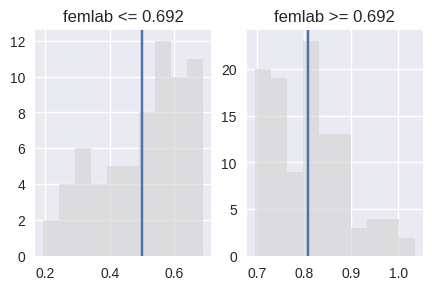

In [88]:
def binarize_histogram(dataframe, variable):
    tmp = dataframe.copy()
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(tmp[variable]), 3)))
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(tmp[variable]), 3)))

binarize_histogram(df, 'femlab')

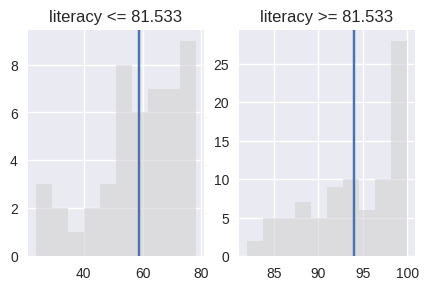

In [89]:
binarize_histogram(df, 'literacy')

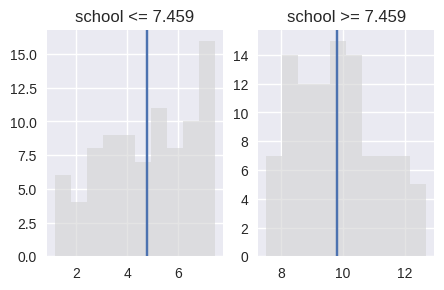

In [90]:
binarize_histogram(df, 'school')

In [116]:
def binarize_histogram_seaborn(dataframe, variable):
    plt.style.use('seaborn') # gráficos estilo seaborn
    plt.rcParams["figure.figsize"] = (5, 3) # Tamaño gráficos
    plt.rcParams["figure.dpi"] = 100 # resolución gráficos    
    
    tmp = dataframe.copy()
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    plt.subplot(1, 2, 1)
    sns.distplot(hist_0).set_title("{0} <= {1}".format(variable, round(np.mean(tmp[variable]), 3)))
    plt.axvline(np.mean(hist_0),color='tomato')
    
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    plt.subplot(1, 2, 2)
    sns.distplot(hist_1).set_title("{0} >= {1}".format(variable, round(np.mean(tmp[variable]), 3)))
    plt.axvline(np.mean(hist_1),color='tomato')
    

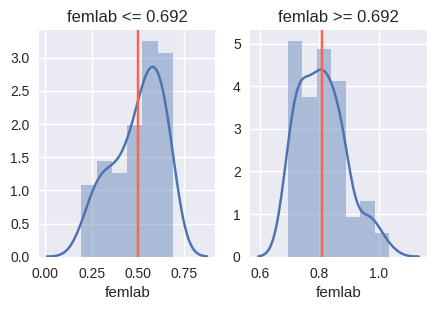

In [117]:
binarize_histogram_seaborn(df, 'femlab')

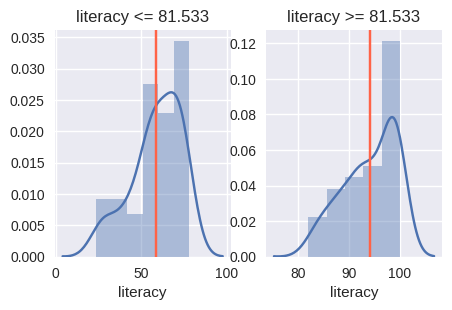

In [118]:
binarize_histogram_seaborn(df, 'literacy')

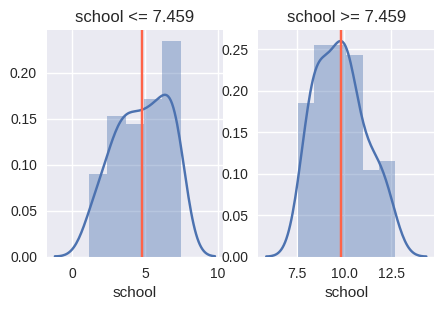

In [119]:
binarize_histogram_seaborn(df, 'school')

In [109]:
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()

    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)

    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable].dropna())
        ax[i].set_title(n)

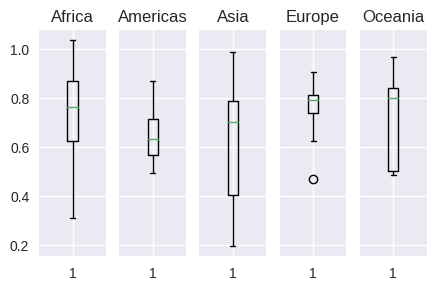

In [111]:
grouped_boxplot(df, 'femlab', 'region')

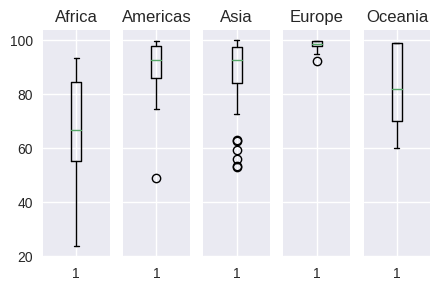

In [112]:
grouped_boxplot(df, 'literacy', 'region')

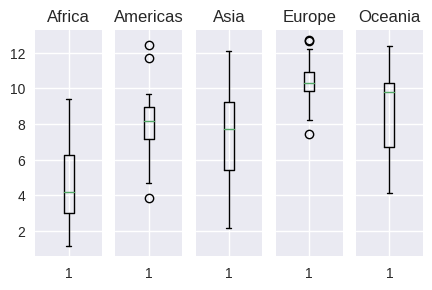

In [113]:
grouped_boxplot(df, 'school', 'region')

In [123]:
def grouped_boxplot_seaborn(dataframe, variable, group_by):
    plt.style.use('seaborn') # gráficos estilo seaborn
    plt.rcParams["figure.figsize"] = (5, 3) # Tamaño gráficos
    plt.rcParams["figure.dpi"] = 100 # resolución gráficos
    
    tmp = dataframe
    stratify_by = tmp[group_by].unique()

    sns.boxplot(data=tmp, y=variable, x=group_by)
        

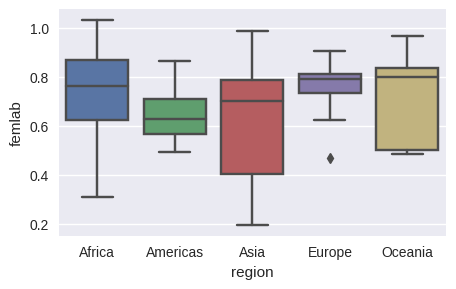

In [124]:
grouped_boxplot_seaborn(df, 'femlab', 'region')

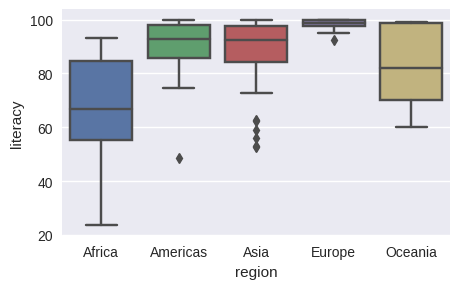

In [125]:
grouped_boxplot_seaborn(df, 'literacy', 'region')

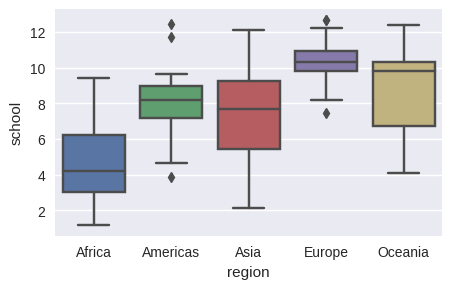

In [126]:
grouped_boxplot_seaborn(df, 'school', 'region')

In [127]:
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)

    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)

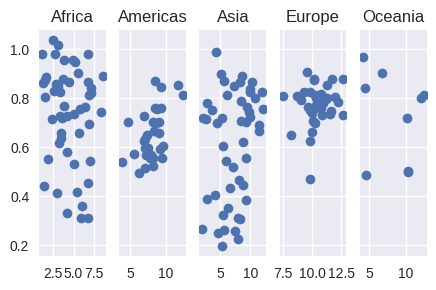

In [132]:
grouped_scatterplot(df, 'school', 'femlab', 'region')

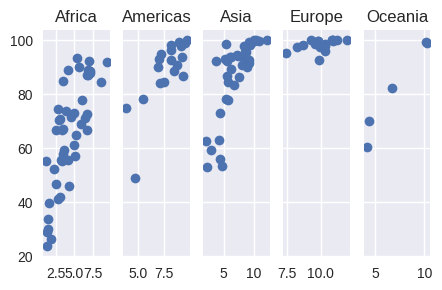

In [134]:
grouped_scatterplot(df, 'school', 'literacy', 'region')

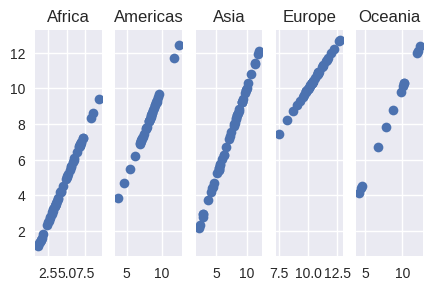

In [133]:
grouped_scatterplot(df, 'school', 'school', 'region')

In [143]:
def grouped_scatterplot_seaborn(dataframe, x, y, group_by):
    tmp = dataframe
    g = sns.FacetGrid(tmp, hue=group_by, height=5)
    g.map(plt.scatter, x, y, s=50, alpha=.7)


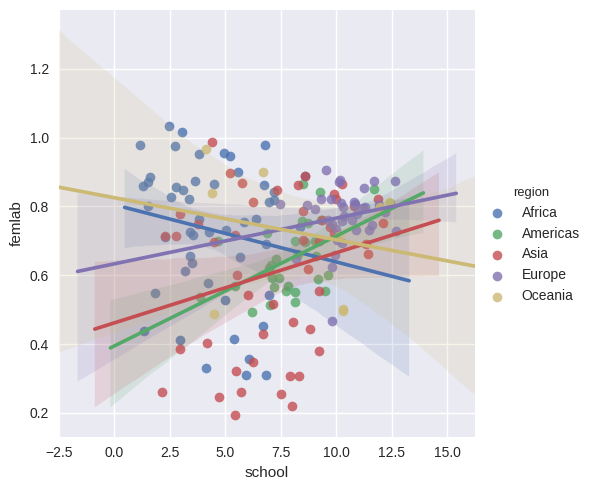

In [150]:
grouped_scatterplot_seaborn(df, 'school', 'femlab', 'region')

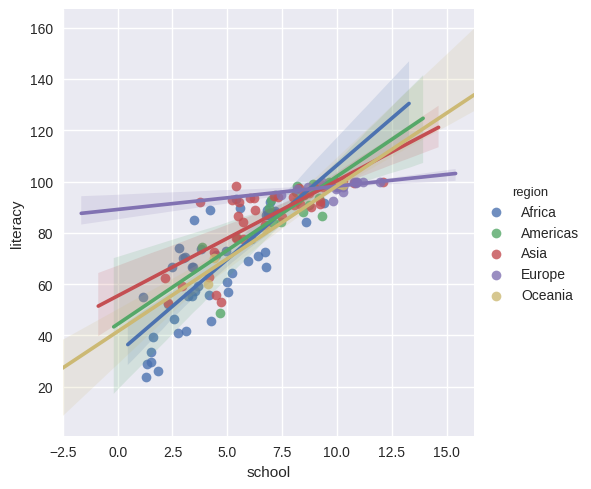

In [151]:
grouped_scatterplot_seaborn(df, 'school', 'literacy', 'region')

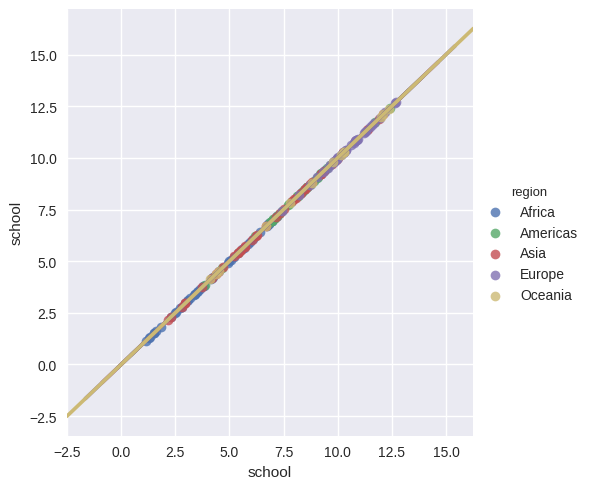

In [152]:
grouped_scatterplot_seaborn(df, 'school', 'school', 'region')

## 3. Genere un heatmap entre todas las variables

En base a las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6

# https://medium.com/@chrisshaw982/seaborn-correlation-heatmaps-customized-10246f4f7f4b

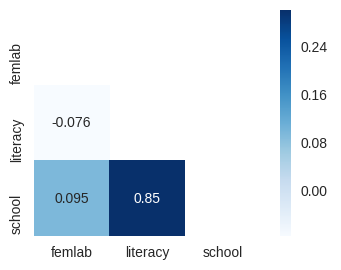

In [181]:
corr_mat = df_subset.corr()
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
#mask = np.triu(sub_set.corr())
with sns.axes_style("white"):
     ax = sns.heatmap(corr_mat, mask=mask, vmax=.3, square=True, cmap='Blues', annot=True)

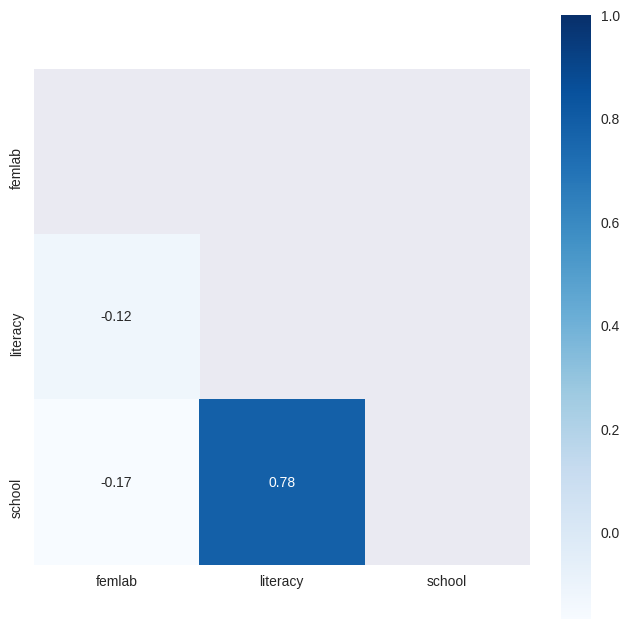

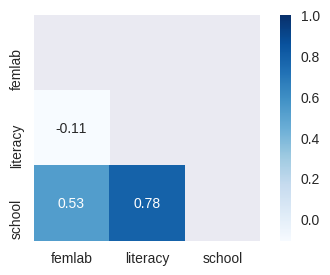

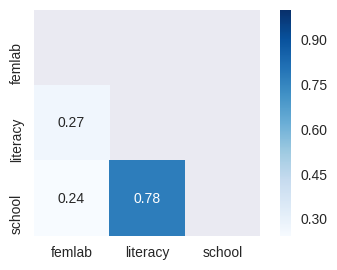

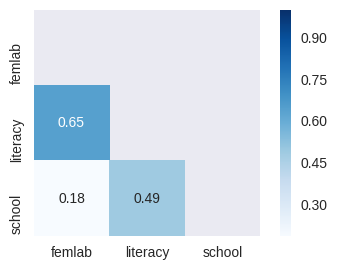

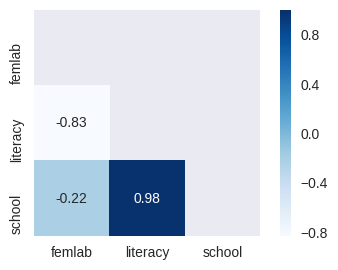

In [172]:
variables_interes = ["femlab", "literacy", "school", "region"]
tmp = df.loc[:,variables_interes]
plt.figure(figsize=(8,8))
for region, sub_set in tmp.groupby("region"):
    sns.heatmap(sub_set.corr(), cmap="Blues", annot=True, square = True, mask=np.triu(sub_set.corr()))
    plt.title = region
    plt.show()
